# Reflection and transmission of plane waves
In seismology, it is often very insightful to analyse the reflection and transmission of plane waves at interfaces. Besides the ray approximation, there are many more parallels with optics. There, the [Fresnel equations](https://en.wikipedia.org/wiki/Fresnel_equations) define reflection and transmission of plane electromagnetic waves. The main difference is that seismic waves include waves with polarisation in the direction of propagation: P-waves. We will consider the case of these longitudinal waves, and the transverse waves we call S-waves, next. (However, if we considered transverse waves with polarization parallel to the interface between two media (SH polarisation), the results for EM and seismic plane waves is identical.)

Next, we will define P/SV reflected and transmitted *amplitudes*, as well as reflection/transmission *coefficients* (R/T), based on the book by Aki and Richards, equations 5.38 and 5.43. At the end of this notebook, we test our scattering matrices on examples treated in figures 2.6.11-12 of Stein and Wysession. 

### All the possible up- and downgoing plane waves 
Below is a figure of downgoing and upcoming plane P and SV waves in medium 1 and 2. Capitals are used for upcoming waves, and small letters are downgoing. The angles with the normal to the interface are $i_1$ and $i_2$ for P-waves in medium 1 and 2, respectively. For S-waves, the angles are $j_1$ and $j_2$.

This notebook calculates the amplitude of all possible reflected and transmitted waves, as well as its reflection and transmission coefficients.

In [1]:
import numpy as np
import cmath as cm
import matplotlib.pyplot as plt

# set up incidence angles between 0 and 90 degrees:
i1s = np.linspace(0,np.pi/2,180)

The scattering amplitude matrix, as defined in 5.38-5.40 in Aki and Richards. NOTE: angles become complex beyond critical incidence. Hence the cmath function for asin. Also, the code below takes into account [a typo in Aki and Richards](https://www.ldeo.columbia.edu/~richards/ARhtml/typos.html) for the PS amplitude.

In [2]:
def matrixM(p,alpha1,alpha2,beta1,beta2,rho1,rho2):
    
    # compute first all possible incidence angles for the set of rayparameters $p$: 
    i1 =[]
    i2 = []
    j1 = []
    j2 = []
    for pi in p:
        i1.append(cm.asin(pi*alpha1))
        i2.append(cm.asin(pi*alpha2))
        j1.append(cm.asin(pi*beta1))
        j2.append(cm.asin(pi*beta2))
    
    # some returning constants in the matrix M:
    a = rho2*(1-2*(beta2**2)*(p**2)) - rho1*(1-2*(beta1**2)*(p**2))
    b = rho2*(1-2*(beta2**2)*(p**2)) + 2*rho1*(beta1**2)*(p**2)
    c = rho1*(1-2*(beta1**2)*(p**2)) + 2*rho2*(beta2**2)*(p**2)
    d = 2*(rho2*(beta2**2) - rho1*(beta1**2))

    E = b*np.cos(i1)/alpha1 + c*np.cos(i2)/alpha2 
    F = b*np.cos(j1)/beta1 + c*np.cos(j2)/beta2 
    G = a - d*(np.cos(i1)/alpha1)*(np.cos(j2)/beta2)
    H = a - d*(np.cos(i2)/alpha2)*(np.cos(j1)/beta1)
    D = E*F + G*H*(p**2)

    # the elements of the scattering matrix. Small letters mean "down", capital letters are "up":
    pP = ((b*(np.cos(i1)/alpha1) -c*(np.cos(i2)/alpha2))*F - (a+ d*(np.cos(i1)/alpha1)*(np.cos(j2)/beta2))*H*(p**2))/D
    sP = -2*(np.cos(j1)/beta1)*(a*b + c*d*(np.cos(i2)/alpha2)*(np.cos(j2)/beta2))*p*beta1/(alpha1*D)
    PP = 2*rho2*(np.cos(i2)/alpha2)*F*alpha2/(alpha1*D)
    SP = 2*rho2*(np.cos(j2)/beta2)*H*p*beta2/(alpha1*D)

    pS = -2*(np.cos(i1)/alpha1)*(a*b + c*d*(np.cos(i2)/alpha2)*(np.cos(j2)/beta2))*alpha1*p/(beta1*D)
    sS = -((b*(np.cos(j1)/beta1)-c*(np.cos(j2)/beta2))*E-(a+ d*(np.cos(i2)/alpha2)*(np.cos(j1)/beta1))*G*(p**2))/D
    PS = -2*rho2*(np.cos(i2)/alpha2)*G*p*alpha2/(D*beta1)
    SS = 2*rho2*(np.cos(j2)/beta2)*E*beta2/(beta1*D)  
    
    pp = 2*rho1*(np.cos(i1)/alpha1)*F*alpha1/(alpha2*D)  
    sp = -2*rho1*(np.cos(j1)/beta1)*G*p*beta1/(alpha2*D)  
    Pp = -((b*np.cos(i1)/alpha1 -c*np.cos(i2)/alpha2)*F + (a+ d*(np.cos(i2)/alpha2)*(np.cos(j1)/beta1))*G*(p**2))/D
    Sp = 2*(np.cos(j2)/beta2)*(a*c + b*d*(np.cos(i1)/alpha1)*(np.cos(j1)/beta1))*p*beta2/(alpha2*D)
    
    ps = 2*rho1*(np.cos(i1)/alpha1)*H*p*alpha1/(beta2*D)
    ss = 2*rho1*(np.cos(j1)/beta1)*E*beta1/(beta2*D)
    Ps = 2*(np.cos(i2)/alpha2)*(a*c + b*d*(np.cos(i1)/alpha1)*(np.cos(j1)/beta1))*p*alpha2/(beta2*D)
    Ss = ((b*(np.cos(j1)/beta1) -c*(np.cos(j2)/beta2))*E + (a+ d*(np.cos(i1)/alpha1)*(np.cos(j2)/beta2))*H*p**2)/D
    
    return np.abs(np.array([[pP, sP, PP, SP],[pS, sS, PS, SS],[pp,sp,Pp,Sp],[ps,ss,Ps,Ss]]))

The scattering energy/intensity matrix from Aki and Richards, equation 5.43, is

In [3]:
def matrixS(p,M,alpha1,alpha2,beta1,beta2,rho1,rho2):
    
    i1 =[]
    i2 = []
    j1 = []
    j2 = []
    for pi in p:
        i1.append(cm.asin(pi*alpha1))
        i2.append(cm.asin(pi*alpha2))
        j1.append(cm.asin(pi*beta1))
        j2.append(cm.asin(pi*beta2))

    # the elements of the scattering matrix. Small letters mean "down", capital letters are "up":
    pP = M[0,0]**2
    sP = ((alpha1*np.cos(i1))/(beta1*np.cos(j1)))*M[0,1]**2
    PP = ((rho1*alpha1*np.cos(i1))/(rho2*alpha2*np.cos(i2)))*M[0,2]**2
    SP = ((rho1*alpha1*np.cos(i1))/(rho2*beta2*np.cos(j2)))*M[0,3]**2

    pS = ((beta1*np.cos(j1))/(alpha1*np.cos(i1)))*M[1,0]**2
    sS = M[1,1]**2
    PS = ((rho1*beta1*np.cos(j1))/(rho2*alpha2*np.cos(i2)))*M[1,2]**2
    SS = ((rho1*beta1*np.cos(j1))/(rho2*beta2*np.cos(j2)))*M[1,3]**2
    
    pp = ((rho2*alpha2*np.cos(i2))/(rho1*alpha1*np.cos(i1)))*M[2,0]**2
    sp = ((rho2*alpha2*np.cos(i2))/(rho1*beta1*np.cos(j1)))*M[2,1]**2
    Pp = M[2,2]**2
    Sp = ((alpha2*np.cos(i2))/(beta2*np.cos(j2)))*M[2,3]**2
    
    ps = ((rho2*beta2*np.cos(j2))/(rho1*alpha1*np.cos(i1)))*M[3,0]**2
    ss = ((rho2*beta2*np.cos(j2))/(rho1*beta1*np.cos(j1)))*M[3,1]**2
    Ps = ((beta2*np.cos(j2))/(alpha2*np.cos(i2)))*M[3,2]**2 
    Ss = M[3,3]**2
    
    return np.array([[pP, sP, PP, SP],[pS, sS, PS, SS],[pp,sp,Pp,Sp],[ps,ss,Ps,Ss]])

### Example 1: An incident P-wave from the Earth's crust into the mantle

The boundary is called the [Mohorovicic dicontinuity](https://en.wikipedia.org/wiki/Mohorovi%C4%8Di%C4%87_discontinuity). First we input our best estimates of the wave speeds and density above and below the "moho": 

In [4]:
alpha1=6800
beta1=3900
rho1= 2800
alpha2=8000
beta2=4600
rho2= 3300

For P-waves going down in the crust, the ray parameter is

In [5]:
p = np.sin(i1s)/alpha1

This rayparameter is constant in the medium for all waves, as we learned from [Snell's Law](https://en.wikipedia.org/wiki/Snell%27s_law).

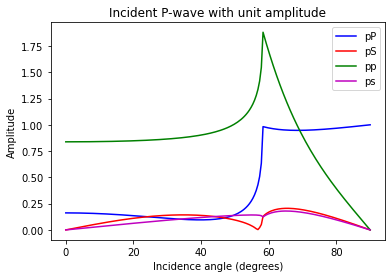

In [6]:
M = matrixM(p,alpha1,alpha2,beta1,beta2,rho1,rho2)
incMp =  M[:,0]

#plot the amplitudes vs. angle of all possible waves from an incidence P-wave:   
plt.plot(i1s/np.pi*180,incMp[0],'b',label='pP')
plt.plot(i1s/np.pi*180,incMp[1],'r',label='pS')
plt.plot(i1s/np.pi*180,incMp[2],'g',label='pp')
plt.plot(i1s/np.pi*180,incMp[3],'m',label='ps')
plt.legend()
plt.xlabel('Incidence angle (degrees)')
plt.ylabel('Amplitude')
plt.title('Incident P-wave with unit amplitude')
plt.show()

The resulting amplitudes may surprise you, particularly the large values of the pp: the P-wave transmitted from crust to mantle. However, when we calculate the reflection and transmission coefficients, associated with the energy in these plane waves, hopefully your confidence in the results is restored:

/home/kvan637/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/kvan637/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/kvan637/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/kvan637/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


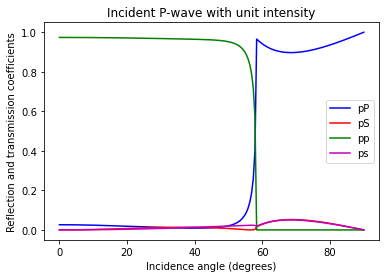

In [7]:
# the full scattering matrix for the intensities is
S = matrixS(p,M,alpha1,alpha2,beta1,beta2,rho1,rho2)

# the column associated with a down-going P-wave energy is 
incSp =  S[:,0]

plt.plot(i1s/np.pi*180,incSp[0],'b',label='pP')
plt.plot(i1s/np.pi*180,incSp[1],'r',label='pS')
plt.plot(i1s/np.pi*180,incSp[2],'g',label='pp')
plt.plot(i1s/np.pi*180,incSp[3],'m',label='ps')

plt.xlabel('Incidence angle (degrees)')
plt.ylabel('Reflection and transmission coefficients')
plt.title('Incident P-wave with unit intensity')
plt.legend()
plt.show()

Now it is clear that energy is conserved: at every angle the four plane wave intensities sum to unity. Beyond 58 degrees, there are no transmitted P-waves, and we call this the *critical angle.* 

BTW, if you get a warning about casting complex values as real is discarding the complex part, this refers to those waves becoming evanescent!


### Example 2: an incident P-wave from ocean into crust
This example is relevant for experiments where an airgun creates a sound wave in the ocean. The relevant values for the wavespeeds are below. The S-wave speed in the ocean is zero, but for numerical stability it is set to a low value of 1 m/s:

In [8]:
alpha1=1500
beta1=1
rho1= 1000
alpha2=5000
beta2=3000
rho2= 3000

For p-waves incident from the ocean into the crust, the ray parameter is

In [9]:
p = np.sin(i1s)/alpha1

And jumping straight the Reflection and Transmission coefficients, we get

/home/kvan637/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/kvan637/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/kvan637/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/kvan637/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


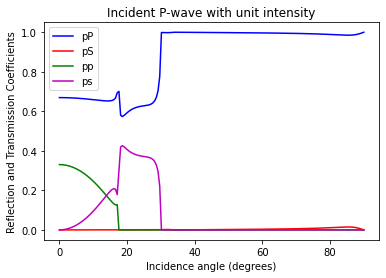

In [10]:
M = matrixM(p,alpha1,alpha2,beta1,beta2,rho1,rho2)
S = matrixS(p,M,alpha1,alpha2,beta1,beta2,rho1,rho2)
incSp =  S[:,0]

plt.plot(i1s/np.pi*180,incSp[0],'b',label='pP')
plt.plot(i1s/np.pi*180,incSp[1],'r',label='pS')
plt.plot(i1s/np.pi*180,incSp[2],'g',label='pp')
plt.plot(i1s/np.pi*180,incSp[3],'m',label='ps')
plt.xlabel('Incidence angle (degrees)')
plt.ylabel('Reflection and Transmission Coefficients')
plt.title('Incident P-wave with unit intensity')
plt.legend()
plt.show()

Now we observe a critical angle of 18 degrees for the P-wave transmission into the crust, and a second critical angle at 30 degrees, where we no longer observe S-waves transmitted into the crust. 

### Example 3: A P-wave coming up from crust into ocean

/home/kvan637/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/kvan637/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/kvan637/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/kvan637/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


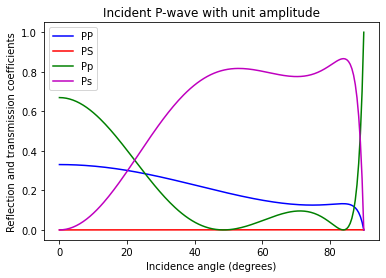

In [11]:
alpha1=1500
beta1=1
rho1= 1000
alpha2=5000
beta2=3000
rho2= 3000

# all the waves for an incident p wave from below:
p = np.sin(i1s)/alpha2
M = matrixM(p,alpha1,alpha2,beta1,beta2,rho1,rho2)
S = matrixS(p,M,alpha1,alpha2,beta1,beta2,rho1,rho2)
incMP =  M[:,2]
incSP =  S[:,2]
# plot the amplitudes vs. angle of all possible waves from an incidence P-wave:   
plt.plot(i1s/np.pi*180,incSP[0],'b',label='PP')
plt.plot(i1s/np.pi*180,incSP[1],'r',label='PS')
plt.plot(i1s/np.pi*180,incSP[2],'g',label='Pp')
plt.plot(i1s/np.pi*180,incSP[3],'m',label='Ps')
plt.xlabel('Incidence angle (degrees)')
plt.ylabel('Reflection and transmission coefficients')
plt.title('Incident P-wave with unit amplitude')
plt.legend()
plt.show()

In this case, there are no upcoming S-waves, as the ocean does not sustain S-wave propagation.

### Example 4, Incident S-wave from crust into ocean:

/home/kvan637/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/kvan637/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/kvan637/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/kvan637/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


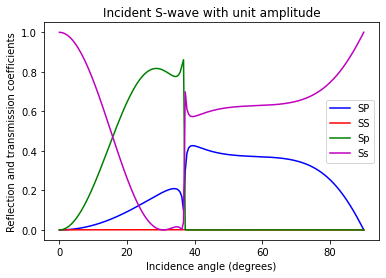

In [12]:
alpha1=1500
beta1=1
rho1= 1000
alpha2=5000
beta2=3000
rho2= 3000

# all the waves for an incident S wave from below:
p = np.sin(i1s)/beta2
M = matrixM(p,alpha1,alpha2,beta1,beta2,rho1,rho2)
S = matrixS(p,M,alpha1,alpha2,beta1,beta2,rho1,rho2)
incMP =  M[:,3]
incSP =  S[:,3]
# plot the amplitudes vs. angle of all possible waves from an incidence P-wave:   
plt.plot(i1s/np.pi*180,incSP[0],'b',label='SP')
plt.plot(i1s/np.pi*180,incSP[1],'r',label='SS')
plt.plot(i1s/np.pi*180,incSP[2],'g',label='Sp')
plt.plot(i1s/np.pi*180,incSP[3],'m',label='Ss')
plt.xlabel('Incidence angle (degrees)')
plt.ylabel('Reflection and transmission coefficients')
plt.title('Incident S-wave with unit amplitude')
plt.legend()
plt.show()

Because in the Earth the variations in physical parameters is often small, there are many ways to approximate the above scattering matrices. Aki and Richards show this in equation 5.46. Further steps then include attenuation and anisotropy, for example.


### Homework
Look up estimates of the physical properties of the core and mantle (at the boundary) and analyse reflection and transmission of plane waves across this boundary in the Earth. 